# Работа со статистикой
## Взять данные из файла populations.txt и описать данные о популяции зайцев (hares), рысей (lynxes) и моркови (carrots) в северной Канаде за 20 лет. 
## Повторить график


Среднее отклонение, зайцы: 34080.95238095238, Стандартное отклонение, зайцы: 20897.906458089667
Среднее отклонение, рыси: 20166.666666666668, Стандартное отклонение, рыси: 16254.591536908763
Среднее отклонение, морковь: 42400.0, Стандартное отклонение, морковь: 3322.5062255844787

Год с максимальной популяцией зайцев: 1903.0
Год с максимальной популяцией рысей: 1904.0
Год с максимальным количеством моркови: 1900.0

Bид с наибольшей популяцией за каждый год: ['C' 'C' 'H' 'H' 'L' 'L' 'C' 'C' 'C' 'C' 'C' 'C' 'H' 'H' 'H' 'L' 'C' 'C'
 'C' 'C' 'C'] 

Годы, когда любая из популяций превышает 50000: [1902. 1903. 1904. 1912. 1913. 1914. 1915.] 

2 года с наименьшей популяцией зайцев: [1917. 1916.]
2 года с наименьшей популяцией рысей: [1900. 1901.]
2 года с наименьшим количеством моркови: [1916. 1903.] 



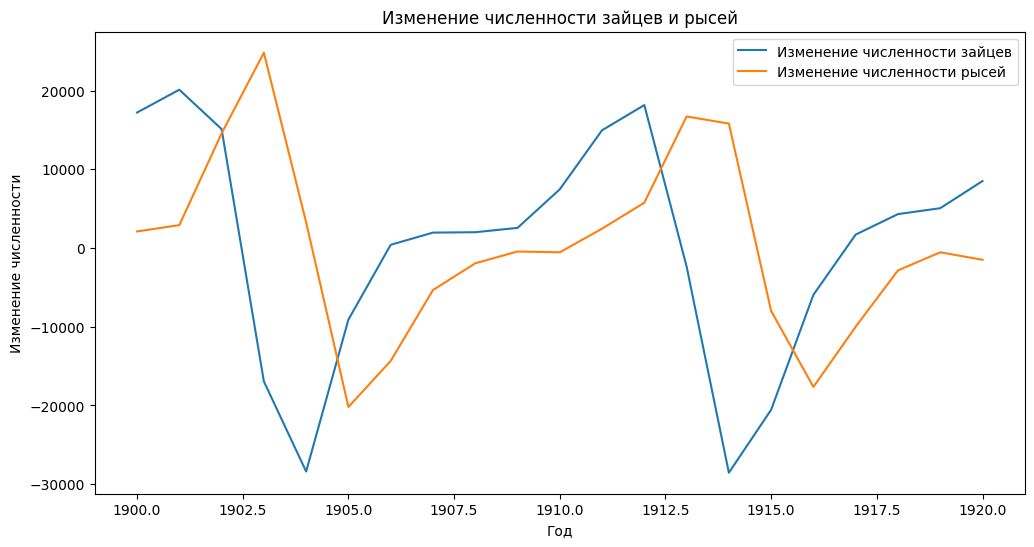

Корреляция между зайцами и рысями: 0.07189206073535571


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Загрузка данных
data = np.loadtxt("https://scipy-lectures.org/_downloads/populations.txt", skiprows=1)
years = data[:, 0]
hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]

# 2. Расчет среднего и стандартного отклонения
mean_hares = np.mean(hares)
std_hares = np.std(hares)

mean_lynxes = np.mean(lynxes)
std_lynxes = np.std(lynxes)

mean_carrots = np.mean(carrots)
std_carrots = np.std(carrots)

print(f"Среднее отклонение, зайцы: {mean_hares}, Стандартное отклонение, зайцы: {std_hares}")
print(f"Среднее отклонение, рыси: {mean_lynxes}, Стандартное отклонение, рыси: {std_lynxes}")
print(f"Среднее отклонение, морковь: {mean_carrots}, Стандартное отклонение, морковь: {std_carrots}\n")

# 3. Год с максимальной популяцией для каждого вида
max_hares_year = years[np.argmax(hares)]
max_lynxes_year = years[np.argmax(lynxes)]
max_carrots_year = years[np.argmax(carrots)]

print(f"Год с максимальной популяцией зайцев: {max_hares_year}")
print(f"Год с максимальной популяцией рысей: {max_lynxes_year}")
print(f"Год с максимальным количеством моркови: {max_carrots_year}\n")

# 4. Определение вида с наибольшей популяцией за каждый год
max_population_species = np.array(['H', 'L', 'C'])
max_population = np.argmax(np.column_stack((hares, lynxes, carrots)), axis=1)
max_population_labels = max_population_species[max_population]

print("Bид с наибольшей популяцией за каждый год:", max_population_labels, "\n")

# 5. Годы, когда любая из популяций превышает 50000
years_above_50000 = years[np.any(data[:, 1:] > 50000, axis=1)]
print("Годы, когда любая из популяций превышает 50000:", years_above_50000,"\n")

# 6. Топ 2 года с наименьшей популяцией для каждого вида
min_hares_years = years[np.argsort(hares)][:2]
min_lynxes_years = years[np.argsort(lynxes)][:2]
min_carrots_years = years[np.argsort(carrots)][:2]

print("2 года с наименьшей популяцией зайцев:", min_hares_years)
print("2 года с наименьшей популяцией рысей:", min_lynxes_years)
print("2 года с наименьшим количеством моркови:", min_carrots_years,"\n")

# 7. Сравнение изменений численности зайцев и рысей
hares_gradient = np.gradient(hares)
lynxes_gradient = np.gradient(lynxes)

plt.figure(figsize=(12, 6))
plt.plot(years, hares_gradient, label='Изменение численности зайцев')
plt.plot(years, lynxes_gradient, label='Изменение численности рысей')
plt.xlabel('Год')
plt.ylabel('Изменениe численности')
plt.title('Изменение численности зайцев и рысей')
plt.legend()
plt.show()

# 8. Проверка корреляции
correlation = np.corrcoef(hares, lynxes)[0, 1]
print("Корреляция между зайцами и рысями:", correlation)
